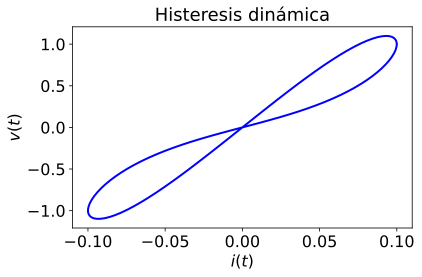

In [15]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.integrate import solve_ivp

label_size = 16
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['DejaVu Sans', 'Tahoma']

%config InlineBackend.figure_format = 'svg' # figuras alta calidad jupyter


# Parámetros
Ron = 100  # Resistencia en estado ON
Roff = 1e4  # Resistencia en estado OFF
A = 0.1e-3  # Amplitud de la excitación
omega = 2  # Frecuencia de la excitación
alf = 0.9  # Índice de característica fractal
delta = 2  # Parámetro de posición
k = 1e4  # Constante

# Funciones
i = lambda t: A*np.cos(omega*t)
R = lambda x: Ron*x + Roff*(1 - x)
v = lambda R, i: R*i

# Tiempo
T = 2 * np.pi/omega
N_cycles = 1
Nt = 100*N_cycles
ti = 0
tf = N_cycles*T
tspan = np.linspace(ti, tf, Nt)

# Ecuaciones
f = lambda x: 1 + x**2
eqns = lambda t, x: k*f(x)*i(t)

# Condición inicial
x0 = [0]

# Resolver la ecuación diferencial
sol = solve_ivp(eqns, [ti, tf], x0, t_eval=tspan, rtol=1e-8, atol=1e-8)
t = sol.t
x = sol.y[0]

# Relaciones memristivas
input_signal = i(t)
response_function = R(x)
output_signal = v(response_function, input_signal)


# graficamos
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.plot(input_signal * 1e3, output_signal, linestyle='-',linewidth=2,color='blue',label='S')
plt.xlabel(r"$i(t)$",
             fontsize=16, color='black')
plt.ylabel(r"$v(t)$",
             fontsize=16, color='black')
plt.title('Histeresis dinámica', fontsize=18)
plt.tight_layout()
plt.show()

